In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
print('Modules are imported.')

Modules are imported.


Importing corona data set 

In [4]:
corona_dataset_cvs = pd.read_csv("Datasets/time_series_covid19_confirmed_global.csv")
corona_dataset_cvs.head(10)


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/12/20,7/13/20,7/14/20,7/15/20,7/16/20,7/17/20,7/18/20,7/19/20,7/20/20,7/21/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,34451,34455,34740,34994,35070,35229,35301,35475,35526,35615
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,3454,3571,3667,3752,3851,3906,4008,4090,4171,4290
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,19195,19689,20216,20770,21355,21948,22549,23084,23691,24278
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,855,858,861,862,877,880,880,880,884,884
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,506,525,541,576,607,638,687,705,749,779
5,NaN,Antigua and Barbuda,17.06080,-61.796400,0,0,0,0,0,0,...,74,74,74,74,74,76,76,76,76,76
6,NaN,Argentina,-38.41610,-63.616700,0,0,0,0,0,0,...,100166,103265,106910,111146,114783,119301,122524,126755,130774,136118
7,NaN,Armenia,40.06910,45.038200,0,0,0,0,0,0,...,31969,32151,32490,33005,33559,34001,34462,34877,34981,35254
8,Australian Capital Territory,Australia,-35.47350,149.012400,0,0,0,0,0,0,...,113,113,113,113,113,113,113,113,113,113
9,New South Wales,Australia,-33.86880,151.209300,0,0,0,0,3,4,...,3492,3505,3517,3527,3535,3550,3568,3588,3599,3614


check the shape of the data frame 

In [6]:
corona_dataset_cvs.shape

(266, 186)

Delete the usless columns

In [8]:
df = corona_dataset_cvs.drop(["Lat","Long"],axis=1,inplace=True)

In [9]:
corona_dataset_cvs.head()

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,7/12/20,7/13/20,7/14/20,7/15/20,7/16/20,7/17/20,7/18/20,7/19/20,7/20/20,7/21/20
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,34451,34455,34740,34994,35070,35229,35301,35475,35526,35615
1,NaN,Albania,0,0,0,0,0,0,0,0,...,3454,3571,3667,3752,3851,3906,4008,4090,4171,4290
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,19195,19689,20216,20770,21355,21948,22549,23084,23691,24278
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,855,858,861,862,877,880,880,880,884,884
4,NaN,Angola,0,0,0,0,0,0,0,0,...,506,525,541,576,607,638,687,705,749,779


In [14]:
corona_dataset_aggregated = corona_dataset_cvs.groupby("Country/Region").sum()

In [16]:
corona_dataset_aggregated.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,7/12/20,7/13/20,7/14/20,7/15/20,7/16/20,7/17/20,7/18/20,7/19/20,7/20/20,7/21/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,34451,34455,34740,34994,35070,35229,35301,35475,35526,35615
Albania,0,0,0,0,0,0,0,0,0,0,...,3454,3571,3667,3752,3851,3906,4008,4090,4171,4290
Algeria,0,0,0,0,0,0,0,0,0,0,...,19195,19689,20216,20770,21355,21948,22549,23084,23691,24278
Andorra,0,0,0,0,0,0,0,0,0,0,...,855,858,861,862,877,880,880,880,884,884
Angola,0,0,0,0,0,0,0,0,0,0,...,506,525,541,576,607,638,687,705,749,779


In [17]:
corona_dataset_aggregated.shape

(188, 182)

Visvalization related to country

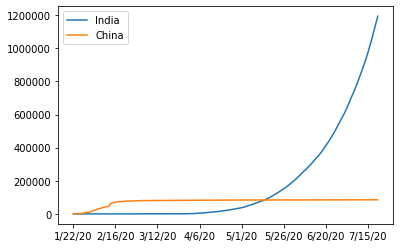

In [26]:
corona_dataset_aggregated.loc["India"].plot()
corona_dataset_aggregated.loc["China"].plot()
plt.legend()

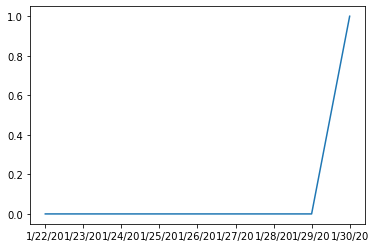

In [34]:
corona_dataset_aggregated.loc["India"][:9].plot()

calculate and plot the first derivative of the curve

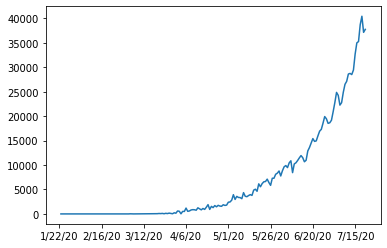

In [35]:
corona_dataset_aggregated.loc["India"].diff().plot()

to find maximum infected rate in one day

In [37]:
corona_dataset_aggregated.loc["India"].diff().max()

40425.0

In [39]:
corona_dataset_aggregated.loc["Italy"].diff().max()

6557.0

In [40]:
corona_dataset_aggregated.loc["Spain"].diff().max()

9630.0

to find maximum infected rate in all countries

In [48]:
countries = list(corona_dataset_aggregated.index)
max_infection_rates = []
for c in countries :
    max_infection_rates.append(corona_dataset_aggregated.loc[c].diff().max())
corona_dataset_aggregated["max_infection_rate"] = max_infection_rates

In [49]:
corona_dataset_aggregated.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,7/13/20,7/14/20,7/15/20,7/16/20,7/17/20,7/18/20,7/19/20,7/20/20,7/21/20,max_infection_rate
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,34455,34740,34994,35070,35229,35301,35475,35526,35615,915.0
Albania,0,0,0,0,0,0,0,0,0,0,...,3571,3667,3752,3851,3906,4008,4090,4171,4290,119.0
Algeria,0,0,0,0,0,0,0,0,0,0,...,19689,20216,20770,21355,21948,22549,23084,23691,24278,607.0
Andorra,0,0,0,0,0,0,0,0,0,0,...,858,861,862,877,880,880,880,884,884,79.0
Angola,0,0,0,0,0,0,0,0,0,0,...,525,541,576,607,638,687,705,749,779,62.0


to creat a new data frame with out date 

In [50]:
corona_data = pd.DataFrame(corona_dataset_aggregated["max_infection_rate"])

In [54]:
corona_data.head()

,max_infection_rate
Country/Region,
Afghanistan,915.0
Albania,119.0
Algeria,607.0
Andorra,79.0
Angola,62.0


importing some other data for comparition 


In [81]:
happiness_report_csv = pd.read_csv("Datasets/world-happiness-report-2019.csv")
happiness_report_csv.head()                                  

,Country or region,Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


to drop the useless columns

In [82]:
useless_cols = ["Ladder","SD of Ladder","Negative affect","Freedom","Corruption","Generosity","Positive affect"]

In [83]:
happiness_report_csv.drop(useless_cols,axis=1,inplace=True)
happiness_report_csv.head()

,Country or region,Social support,Log of GDP\nper capita,Healthy life\nexpectancy
0,Finland,2.0,22.0,27.0
1,Denmark,4.0,14.0,23.0
2,Norway,3.0,7.0,12.0
3,Iceland,1.0,15.0,13.0
4,Netherlands,15.0,12.0,18.0


to change the index of the data frame 

In [87]:
happiness_report_csv.set_index("Country or region",inplace=True)
happiness_report_csv.head()

,Social support,Log of GDP\nper capita,Healthy life\nexpectancy
Country or region,,,
Finland,2.0,22.0,27.0
Denmark,4.0,14.0,23.0
Norway,3.0,7.0,12.0
Iceland,1.0,15.0,13.0
Netherlands,15.0,12.0,18.0


to join two data set 

In [88]:
corona_data.head()

,max_infection_rate
Country/Region,
Afghanistan,915.0
Albania,119.0
Algeria,607.0
Andorra,79.0
Angola,62.0


In [89]:
corona_data.shape

(188, 1)

In [90]:
happiness_report_csv.head()

,Social support,Log of GDP\nper capita,Healthy life\nexpectancy
Country or region,,,
Finland,2.0,22.0,27.0
Denmark,4.0,14.0,23.0
Norway,3.0,7.0,12.0
Iceland,1.0,15.0,13.0
Netherlands,15.0,12.0,18.0


In [91]:
happiness_report_csv.shape

(156, 3)

In [92]:
data = corona_data.join(happiness_report_csv,how="inner")
data.head()

,max_infection_rate,Social support,Log of GDP\nper capita,Healthy life\nexpectancy
Afghanistan,915.0,151.0,134.0,139.0
Albania,119.0,133.0,81.0,40.0
Algeria,607.0,101.0,72.0,78.0
Argentina,5344.0,46.0,55.0,37.0
Armenia,771.0,117.0,91.0,64.0


correlation matrix

In [93]:
data.corr()

,max_infection_rate,Social support,Log of GDP\nper capita,Healthy life\nexpectancy
max_infection_rate,1.000000,-0.103475,-0.110108,-0.118358
Social support,-0.103475,1.000000,0.784339,0.758936
Log of GDP\nper capita,-0.110108,0.784339,1.000000,0.849855
Healthy life\nexpectancy,-0.118358,0.758936,0.849855,1.000000


visualization of results

In [94]:
data.head()

,max_infection_rate,Social support,Log of GDP\nper capita,Healthy life\nexpectancy
Afghanistan,915.0,151.0,134.0,139.0
Albania,119.0,133.0,81.0,40.0
Algeria,607.0,101.0,72.0,78.0
Argentina,5344.0,46.0,55.0,37.0
Armenia,771.0,117.0,91.0,64.0


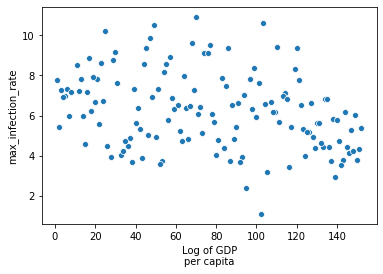

In [97]:
x = data["Log of GDP\nper capita"]
y = data["max_infection_rate"]
sns.scatterplot(x,np.log(y))

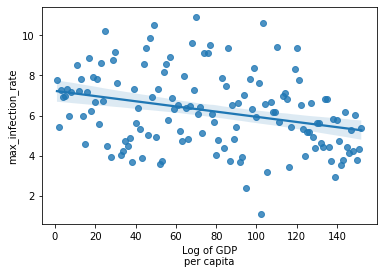

In [98]:
sns.regplot(x,np.log(y))